In [1]:
import tushare as ts
import time
import datetime
import sys
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
#df = Imputer().fit_transform(df)
sys.path.append('../Codes')
import DataProcessor as DP
from DataProcessor import centralize
from DataProcessor import standardize
from DataProcessor import standardize_industry
from DataProcessor import ma_ratio

In [2]:
#获取行业分类
industrys = DP.get_industrys()

In [858]:
industry=['801080.SI',
          '801760.SI',
          '801740.SI',
          '801750.SI',
          '801010.SI',
          '801770.SI',
         ]
industry = ['801010.SI']
#industry='all'
#取行业内股票数据
data = DP.get_daily_data(industry=industry,
                         fields=['open',
                                 'high',
                                 'low',
                                 'close',
                                 'adj_factor',
                                 'turnover_rate_f',
                                 'pe_ttm',
                                 'pb',
                                 'ps_ttm',
                                 'total_mv'])



In [859]:
#因子构造
OPEN = np.log(data['open'] * data['adj_factor'])
HIGH = np.log(data['high'] * data['adj_factor'])
LOW = np.log(data['low'] * data['adj_factor'])
CLOSE = np.log(data['close'] * data['adj_factor'])

trf = data['turnover_rate_f']
ltrf = np.log(trf)

mv = data['total_mv']
lmv = np.log(mv)
tmv = mv ** 3

pe = data['pe_ttm']
pb = data['pb']
ps = data['ps_ttm']
pe = 1 / pe
ps = 1 / ps
pb = 1 / pb

In [860]:
ror = CLOSE - CLOSE.shift()
r_rinei = CLOSE - OPEN
r_geye = OPEN - CLOSE.shift()
rh = HIGH - OPEN
rl = LOW - OPEN
hl = rh - rl
vr = ltrf - ltrf.shift()

In [861]:
n = 2
y = standardize_industry(ror.rolling(n).sum().shift(-n+1) - r_geye, industrys, industry)
y[(r_geye > 0.09).fillna(False) & (r_rinei.abs() < 1e-6).fillna(False)] = 0

In [862]:
x1 = standardize_industry(r_rinei, industrys, industry)
x2 = standardize_industry(r_rinei, industrys, industry).rolling(1).mean().shift(1)
x3 = standardize_industry(r_rinei, industrys, industry).rolling(1).mean().shift(2)
x4 = standardize_industry(r_rinei, industrys, industry).rolling(2).mean().shift(3)
x5 = standardize_industry(r_rinei, industrys, industry).rolling(5).mean().shift(5)
x6 = standardize_industry(r_rinei, industrys, industry).rolling(5).mean().shift(10)
x7 = standardize_industry(r_rinei, industrys, industry).rolling(5).mean().shift(15)

z1 = standardize_industry(r_geye, industrys, industry)
z2 = standardize_industry(r_geye, industrys, industry).rolling(1).mean().shift(1)
z3 = standardize_industry(r_geye, industrys, industry).rolling(1).mean().shift(2)
z4 = standardize_industry(r_geye, industrys, industry).rolling(2).mean().shift(3)
z5 = standardize_industry(r_geye, industrys, industry).rolling(5).mean().shift(5)
z6 = standardize_industry(r_geye, industrys, industry).rolling(5).mean().shift(10)
z7 = standardize_industry(r_geye, industrys, industry).rolling(5).mean().shift(15)

u1 = standardize_industry(ror, industrys, industry)
u2 = standardize_industry(ror, industrys, industry).rolling(1).mean().shift(1)
u3 = standardize_industry(ror, industrys, industry).rolling(1).mean().shift(2)
u4 = standardize_industry(ror, industrys, industry).rolling(2).mean().shift(3)
u5 = standardize_industry(ror, industrys, industry).rolling(5).mean().shift(5)
u6 = standardize_industry(ror, industrys, industry).rolling(5).mean().shift(10)
u7 = standardize_industry(ror, industrys, industry).rolling(5).mean().shift(15)

h1 = standardize_industry(rh, industrys, industry)
h2 = standardize_industry(rh, industrys, industry).rolling(1).mean().shift(1)
h3 = standardize_industry(rh, industrys, industry).rolling(1).mean().shift(2)
h4 = standardize_industry(rh, industrys, industry).rolling(2).mean().shift(3)
h5 = standardize_industry(rh, industrys, industry).rolling(5).mean().shift(5)
h6 = standardize_industry(rh, industrys, industry).rolling(5).mean().shift(10)
h7 = standardize_industry(rh, industrys, industry).rolling(5).mean().shift(15)

l1 = standardize_industry(rl, industrys, industry)
l2 = standardize_industry(rl, industrys, industry).rolling(1).mean().shift(1)
l3 = standardize_industry(rl, industrys, industry).rolling(1).mean().shift(2)
l4 = standardize_industry(rl, industrys, industry).rolling(2).mean().shift(3)
l5 = standardize_industry(rl, industrys, industry).rolling(5).mean().shift(5)
l6 = standardize_industry(rl, industrys, industry).rolling(5).mean().shift(10)
l7 = standardize_industry(rl, industrys, industry).rolling(5).mean().shift(15)

hl1 = standardize_industry(hl, industrys, industry)
hl2 = standardize_industry(hl, industrys, industry).rolling(1).mean().shift(1)
hl3 = standardize_industry(hl, industrys, industry).rolling(1).mean().shift(2)
hl4 = standardize_industry(hl, industrys, industry).rolling(2).mean().shift(3)
hl5 = standardize_industry(hl, industrys, industry).rolling(5).mean().shift(5)
hl6 = standardize_industry(hl, industrys, industry).rolling(5).mean().shift(10)
hl7 = standardize_industry(hl, industrys, industry).rolling(5).mean().shift(15)

vr1 = standardize_industry(vr, industrys, industry)
vr2 = standardize_industry(vr, industrys, industry).rolling(1).mean().shift(1)
vr3 = standardize_industry(vr, industrys, industry).rolling(1).mean().shift(2)
vr4 = standardize_industry(vr, industrys, industry).rolling(2).mean().shift(3)
vr5 = standardize_industry(vr, industrys, industry).rolling(5).mean().shift(5)
vr6 = standardize_industry(vr, industrys, industry).rolling(5).mean().shift(10)
vr7 = standardize_industry(vr, industrys, industry).rolling(5).mean().shift(15)

pe = standardize_industry(pe, industrys, industry)
pb = standardize_industry(pb, industrys, industry)
ps = standardize_industry(ps, industrys, industry)

mv = standardize_industry(mv, industrys, industry)
lmv = standardize_industry(lmv, industrys, industry)
tmv = standardize_industry(tmv, industrys, industry)

In [863]:
factor = {
    'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7,
    'z1':z1, 'z2':z2, 'z3':z3, 'z4':z4, 'z5':z5, 'z6':z6, 'z7':z7,
    'u1':u1, 'u2':u2, 'u3':u3, 'u4':u4, 'u5':u5, 'u6':u6, 'u7':u7,
    'h1':h1, 'h2':h2, 'h3':h3, 'h4':h4, 'h5':h5, 'h6':h6, 'h7':h7,
    'l1':l1, 'l2':l2, 'l3':l3, 'l4':l4, 'l5':l5, 'l6':l6, 'l7':l7,
    'hl1':hl1, 'hl2':hl2, 'hl3':hl3, 'hl4':hl4, 'hl5':hl5, 'hl6':hl6, 'hl7':hl7,
    'vr1':vr1, 'vr2':vr2, 'vr3':vr3, 'vr4':vr4, 'vr5':vr5, 'vr6':vr6, 'vr7':vr7,
    'pe':pe, 'pb':pb, 'ps':ps,
    'mv':mv, 'lmv':lmv, 'tmv':tmv,
}

In [867]:
begin_date = '2010-01-01'
split_date = '2018-01-01'
train_date = y.index[(begin_date < y.index) & (y.index < split_date)]
test_date = y.index[y.index > split_date]

In [868]:
df_y_train = DataFrame({'y':y.loc[train_date, :].values.flatten()})
df_x_train = DataFrame({k:factor[k].loc[train_date, :].shift().values.flatten() for k in factor.keys()})

In [869]:
df_y_test = DataFrame({'y':y.loc[test_date, :].values.flatten()})
df_x_test = DataFrame({k:factor[k].loc[test_date, :].shift().values.flatten() for k in factor.keys()})

In [870]:
df_train = pd.concat([df_y_train, df_x_train], axis=1)
df_test = pd.concat([df_y_test, df_x_test], axis=1)

In [871]:
#df_train.corr().iloc[0,:].abs().sort_values()

In [872]:
#model = smf.ols('y~lmv+u4+hl1+h5+l4+x5+hl2+x1+x2+h6+vr4+l2+u2+hl7+hl3+u5+u1', data=df_train).fit()
#model.tvalues

In [879]:
model = smf.ols('y~x1+x2+x4+x5\
                  +z1+z4\
                  \
                  +h1+h2\
                  \
                  \
                  \
                  +pe\
                  +lmv', data=df_train).fit()
model.tvalues

Intercept    -0.137700
x1           -7.986728
x2           -7.440223
x4           -9.622038
x5            2.340765
z1            3.097447
z4           -5.255089
h1            5.430304
h2            3.198796
pe            3.570354
lmv         -13.078943
dtype: float64

300829.SZ    0.129120
002286.SZ    0.116263
300021.SZ    0.105860
300175.SZ    0.077803
000911.SZ    0.075835
603363.SH    0.065314
000798.SZ    0.064172
603566.SH    0.058053
300087.SZ    0.056782
600097.SH    0.045059
Name: 2020-07-15 00:00:00, dtype: float64


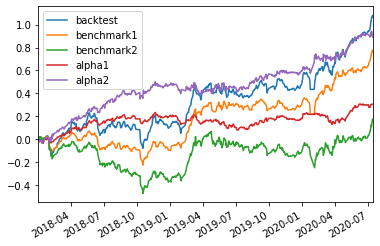

In [882]:
#调仓周期
m = 2
y_hat = DataFrame(model.predict(df_test).values.reshape(len(test_date), len(y.columns)), index=test_date, columns=y.columns)
position = (y_hat.gt(y_hat.quantile(0.9, 1), 0))

ror_test = ror.loc[test_date, :]
r_rinei_test = r_rinei.loc[test_date, :]
r_geye_test = r_geye.loc[test_date, :]

ror_huice = position * (ror_test.rolling(m).sum().shift(-m+1) - r_geye_test) / m
ror_huice[ror_huice==0] = np.nan
ror_huice.mean(1).cumsum().plot()

benchmark1 = (ror_test.rolling(m).sum().shift(-m+1) - r_geye_test) / m
benchmark1.mean(1).cumsum().plot()
benchmark2 = ror_test
benchmark2.mean(1).cumsum().plot()

alpha1 = ror_huice.mean(1).cumsum() - benchmark1.mean(1).cumsum()
alpha2 = ror_huice.mean(1).cumsum() - benchmark2.mean(1).cumsum()
alpha1.plot()
alpha2.plot()
#for i in industry:
#    stock = industrys[i]
#    ror_test.loc[:,stock].mean(1).cumsum().plot()
plt.legend(['backtest', 'benchmark1', 'benchmark2', 'alpha1', 'alpha2'] + [i for i in industry])
print(y_hat.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:10])

In [883]:
position.sum(1)

2018-01-02    0
2018-01-03    7
2018-01-04    7
2018-01-05    7
2018-01-08    7
             ..
2020-07-09    7
2020-07-10    7
2020-07-13    7
2020-07-14    7
2020-07-15    7
Length: 615, dtype: int64

In [884]:
df_y_test2 = DataFrame({'y':y.loc[test_date, :].values.flatten()})
df_x_test2 = DataFrame({k:factor[k].loc[test_date, :].values.flatten() for k in factor.keys()})
df_test2 = pd.concat([df_y_test2, df_x_test2], axis=1)
y_hat2 = DataFrame(model.predict(df_test2).values.reshape(len(ror_test), len(ror_test.columns)), index=ror_test.index, columns=ror_test.columns)
print(y_hat2.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:10])

603363.SH    0.113558
300829.SZ    0.089692
002852.SZ    0.088179
600540.SH    0.075239
603668.SH    0.072485
000592.SZ    0.068906
600195.SH    0.068519
600467.SH    0.068034
000798.SZ    0.054606
300087.SZ    0.053120
Name: 2020-07-15 00:00:00, dtype: float64


In [465]:
df_train = df_train.dropna()
model = RandomForestRegressor(n_estimators=10).fit(df_train.iloc[:, 1:], df_train.iloc[:, 0])
model.feature_importances_

array([0.05159753, 0.05007378, 0.04443164, 0.04619165, 0.04480049,
       0.04128151, 0.04127881, 0.05454827, 0.05270984, 0.05264996,
       0.04963717, 0.05406033, 0.04655707, 0.04854932, 0.0502602 ,
       0.0494474 , 0.04531465, 0.04479211, 0.04590302, 0.0421521 ,
       0.04376315])